
# WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [9]:
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

630
630


In [10]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,ushuaia,,AR,,,,,,
1,busselton,,AU,,,,,,
2,albany,,AU,,,,,,
3,banmo,,MM,,,,,,
4,kamloops,,CA,,,,,,


# API Calls

In [11]:
#Variables to keep track of response number
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Ushuaia
Processing Weather Data for Record 2 of Set 1 | Busselton
Processing Weather Data for Record 3 of Set 1 | Albany
City not found....Skipping............
Processing Weather Data for Record 4 of Set 1 | Kamloops
Processing Weather Data for Record 5 of Set 1 | Bengkulu
City not found....Skipping............
Processing Weather Data for Record 6 of Set 1 | Jamestown
Processing Weather Data for Record 7 of Set 1 | Cuencamé de Ceniceros
Processing Weather Data for Record 8 of Set 1 | Tasiilaq
Processing Weather Data for Record 9 of Set 1 | Hermanus
Processing Weather Data for Record 10 of Set 1 | Cabo San Lucas
Processing Weather Data for Record 11 of Set 1 | Souillac
Processing Weather Data for Record 12 of Set 1 | Dunedin
Processing Weather Data for Record 13 of Set 1 | Callaway
Processing Weather Data for Record 14 of Set 1 | Hobart
Processing Weather

Processing Weather Data for Record 29 of Set 3 | Chui
Processing Weather Data for Record 30 of Set 3 | Kulhudhuffushi
Processing Weather Data for Record 31 of Set 3 | Rio Grande
Processing Weather Data for Record 32 of Set 3 | Bluff
Processing Weather Data for Record 33 of Set 3 | Vestmannaeyjar
Processing Weather Data for Record 34 of Set 3 | Abashiri
Processing Weather Data for Record 35 of Set 3 | Ekhabi
Processing Weather Data for Record 36 of Set 3 | São Filipe
Processing Weather Data for Record 37 of Set 3 | Chitral
Processing Weather Data for Record 38 of Set 3 | Ahipara
City not found....Skipping............
Processing Weather Data for Record 39 of Set 3 | Grants
Processing Weather Data for Record 40 of Set 3 | Constitucion
Processing Weather Data for Record 41 of Set 3 | Sitka
Processing Weather Data for Record 42 of Set 3 | Joshīmath
Processing Weather Data for Record 43 of Set 3 | Sistranda
Processing Weather Data for Record 44 of Set 3 | Vostok
Processing Weather Data for R

Processing Weather Data for Record 11 of Set 6 | Mobaye
Processing Weather Data for Record 12 of Set 6 | Adrar
Processing Weather Data for Record 13 of Set 6 | Manokwari
Processing Weather Data for Record 14 of Set 6 | Talnakh
Processing Weather Data for Record 15 of Set 6 | Provideniya
Processing Weather Data for Record 16 of Set 6 | Camalú
Processing Weather Data for Record 17 of Set 6 | Luwuk
Processing Weather Data for Record 18 of Set 6 | Vila Praia de Âncora
Processing Weather Data for Record 19 of Set 6 | Naviraí
Processing Weather Data for Record 20 of Set 6 | Jangipur
Processing Weather Data for Record 21 of Set 6 | Strezhevoy
Processing Weather Data for Record 22 of Set 6 | Maceió
Processing Weather Data for Record 23 of Set 6 | Hofn
Processing Weather Data for Record 24 of Set 6 | Miyako
Processing Weather Data for Record 25 of Set 6 | Annau
Processing Weather Data for Record 26 of Set 6 | Broome
Processing Weather Data for Record 27 of Set 6 | Flinders
Processing Weather Da

Processing Weather Data for Record 42 of Set 8 | Kharan
City not found....Skipping............
Processing Weather Data for Record 43 of Set 8 | Tuy Hoa
City not found....Skipping............
Processing Weather Data for Record 44 of Set 8 | Micheweni
Processing Weather Data for Record 45 of Set 8 | Esperance
Processing Weather Data for Record 46 of Set 8 | Yamada
Processing Weather Data for Record 47 of Set 8 | Qasigiannguit
Processing Weather Data for Record 48 of Set 8 | Sisimiut
Processing Weather Data for Record 49 of Set 8 | Hobyo
Processing Weather Data for Record 50 of Set 8 | Lusambo
Processing Weather Data for Record 1 of Set 9 | Pangody
Processing Weather Data for Record 2 of Set 9 | Coria
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 3 of Set 9 | Shorewood
City not found....Skipping............
Processing Weather Data for Record 4 of Set 9 | Chapais
Processing Weather Data for Record 5 of Set 9 | Narsaq
Proces

Processing Weather Data for Record 26 of Set 11 | Lebedyn
Processing Weather Data for Record 27 of Set 11 | Shache
Processing Weather Data for Record 28 of Set 11 | Pahrump
Processing Weather Data for Record 29 of Set 11 | Riberalta
Processing Weather Data for Record 30 of Set 11 | Sechura
Processing Weather Data for Record 31 of Set 11 | Ambilobe
Processing Weather Data for Record 32 of Set 11 | Itoman
Processing Weather Data for Record 33 of Set 11 | Xinglongshan
Processing Weather Data for Record 34 of Set 11 | Soroti
Processing Weather Data for Record 35 of Set 11 | Palmerston
Processing Weather Data for Record 36 of Set 11 | San Juan
Processing Weather Data for Record 37 of Set 11 | Yar-Sale
Processing Weather Data for Record 38 of Set 11 | Kassala
Processing Weather Data for Record 39 of Set 11 | Stolac
Processing Weather Data for Record 40 of Set 11 | Suntar
Processing Weather Data for Record 41 of Set 11 | Arlit
Processing Weather Data for Record 42 of Set 11 | San Jose
Process

In [16]:
#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("output/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,ushuaia,40,AR,1600876514,43,-54.8,-68.3,51.80,19.46
1,busselton,0,AU,1600876514,52,-33.65,115.33,59.00,14.09
2,albany,40,AU,1600876514,93,-35.02,117.89,50.00,9.17
4,kamloops,90,CA,1600876514,62,50.67,-120.32,59.00,13.87
5,bengkulu,95,ID,1600876515,89,-3.8,102.27,78.66,6.38


In [17]:
city_weather.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Windspeed     569
dtype: int64

## Plotting the Data

### Latitude vs. Temperature Plot

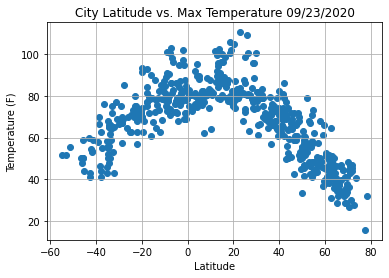

In [18]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

### Latitude vs Humidity Plot

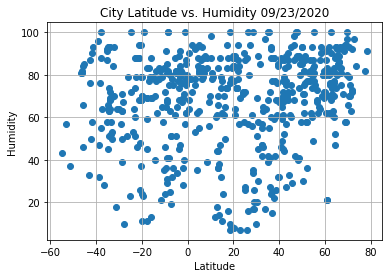

In [19]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs. Humidity.png")

# Show plot
plt.show()

### Latitude vs Cloudiness Plot

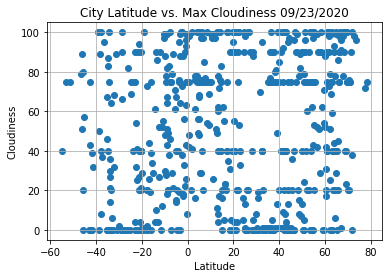

In [20]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs Windspeed plot

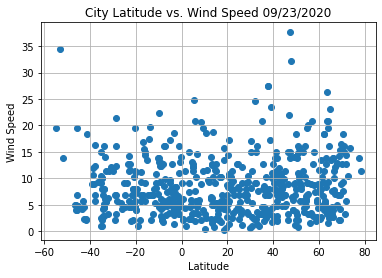

In [21]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

---
# Linear Regression Plots
---

In [35]:
northern = city_weather[city_weather["Lat"] >= 0.0]   # locate northern cities by latitude
northern.reset_index(inplace=True)

southern = city_weather[city_weather["Lat"] < 0.0]   # locate southern cities by latitude
southern.reset_index(inplace=True)

In [111]:
# Define linear regression plotting convenience function 

def plot_linear_regression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl.upper())
    plt.ylabel(ylbl.upper())
    plt.savefig(f"output/LinearRegression/{ifig}.png")
    plt.show()

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8588768154371678


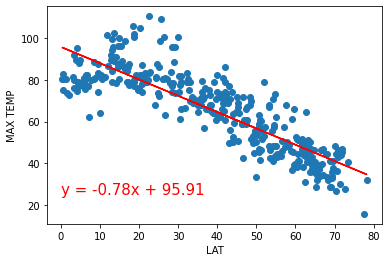

In [105]:
xlabel = "Lat"
ylabel = "Max Temp"
lblpos = (0,25)
plot_linear_regression(northern["Lat"].astype(float),northern["Max Temp"].astype(float),
                       xlabel,ylabel,lblpos,"Northern-Lat-vs-Max Temp") 

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1587301638280658


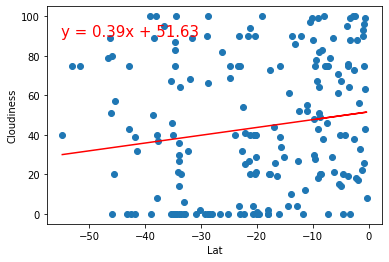

In [112]:
lblpos = (-55,90)
plotLinearRegression(southern[xlabel].astype(float),southern[ylabel].astype(float),
                     xlabel,ylabel,lblpos,"Southern-Lat-vs-Max Temp")

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20040907233893207


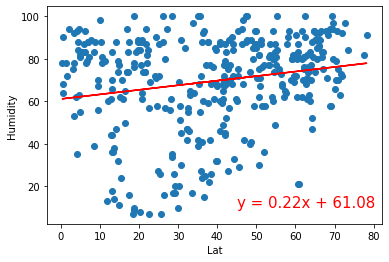

In [113]:
ylabel = "Humidity"  # reassign y label
lblpos = (45,10)
plotLinearRegression(northern[xlabel].astype(float),northern[ylabel].astype(float),
                     xlabel, ylabel, lblpos, "Northern-Lat-vs-Humidity")

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.010979452407823656


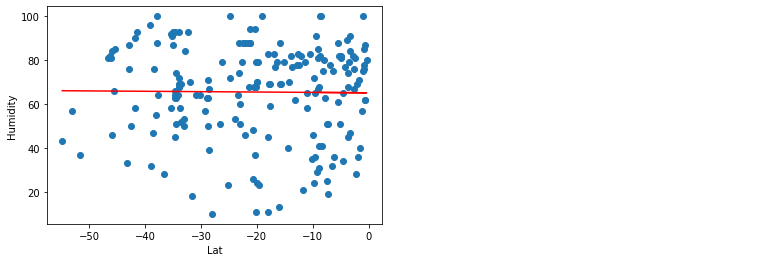

In [114]:
lblpos = (45,10)
plotLinearRegression(southern[xlabel].astype(float),southern[ylabel].astype(float),
                     xlabel, ylabel, lblpos, "Southern-Lat-vs-Humidity")

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05775060936533807


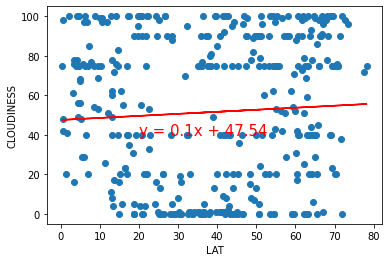

In [115]:
ylabel = "Cloudiness"  # reassign y Label
lblpos = (20,40)
plotLinearRegression(northern[xlabel].astype(float),northern[ylabel].astype(float),
                     xlabel.upper(),ylabel.upper(),lblpos,"Northern-Lat-vs-Cloudiness")

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.07926506026674186


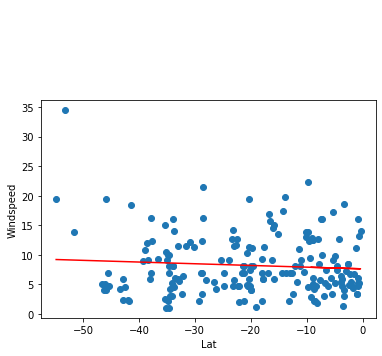

In [119]:
lblpos = (-55,50)
plotLinearRegression(southern[xlabel].astype(float),southern[ylabel].astype(float),
                     xlabel,ylabel,lblpos,"Southern-Lat-vs-Cloudiness")

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12513424496395859


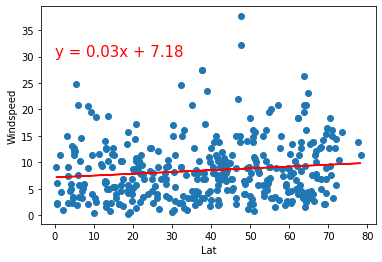

In [120]:
ylabel = "Windspeed"  # reassign y label
lblpos = (0,30)
plotLinearRegression(northern[xlabel].astype(float),northern[ylabel].astype(float),
                     xlabel, ylabel, lblpos, "Nothern-Lat-vs-Windspeed")

### Southern Hemisphere - Wind speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.07926506026674186


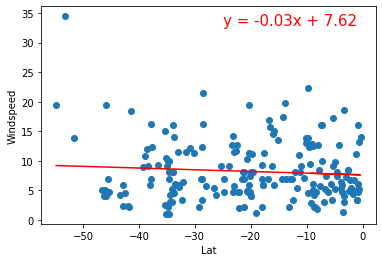

In [121]:
lblpos = (-25,33)
plotLinearRegression(southern[xlabel].astype(float),southern[ylabel].astype(float),
                     xlabel,ylabel,lblpos,"Southern-Lat-vs-Windspeed")

### Weather Data Analysis

* As we approach the equator the temperature increases.
* Since data has been collected in summer the temperatures are warmer in northen hemisphire.
* There is no relationship between city latitude and wind speed, cloudiness and Humidity.
* Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic
